In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import MultipleLocator, FormatStrFormatter
import sys
import os
import re
sys.path.append('..')
plt.rcParams['font.family'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号
pd.set_option('display.max_columns', None) #显示所有列，把行显示设置成最大
pd.set_option('display.max_rows', None) #显示所有行，把列显示设置成最大
#交互式绘图
%matplotlib widget

In [2]:
path = "log20240704.txt"

In [22]:
[f"Mark{i}{o}" for i in range(32) if i%2 == 0 o="X" else 0="Y"]

SyntaxError: invalid syntax (827759407.py, line 1)

## 1.数据提取
### 1.数据字段&存储定义

In [9]:
def gendict(namelist:list)->dict:
    return {item: [] for item in namelist}
keyword_top = [
           "左侧TopDieMark1定位 PR执行结果",
           "左侧上视左标定片阵列Mark定位 PR执行结果",
           "左侧TopDieMark2定位 PR执行结果",
           "左侧上视右标定片阵列Mark定位 PR执行结果",
            ]
TopDieMark1 = gendict(["time","TopDieMark1X","TopDieMark1Y"])

keyword_bot = [
           "左侧BottomDieMark1定位 PR执行结果",
           "左侧左下视标定片阵列Mark定位 PR执行结果",
           "左侧BottomDieMark2定位 PR执行结果",
           "左侧右下视标定片阵列Mark定位 PR执行结果",
            ]
keyword_angle = [
        "LeftBondModule第1次角度校正",
        "LeftBondModule第2次角度校正",
        "LeftBondModule第3次角度校正"
        ]
angle1 = gendict(["time","angle1"])
angle2 = gendict(["time","angle2"])
angle3 = gendict(["time","angle3"])

keyword_tbl = [
           "Top vec length",
           "Bottom vec length",
            ]
           "当前力控值："
        #    "对位调整完成"
           ]
# TopVec = {'time':[],'TopVec':[]}
# BottomVec = {'time':[],'BottomVec':[]}
# TDM1 = {'time':[],
#         'TDM1X':[],'TDM1Y':[],'TDM1A':[]}
# U_LBM = {'time':[],
#         'U_LBM1X':[],'U_LBM1Y':[],
#         'U_LBM2X':[],'U_LBM2Y':[],
#         'U_LBM3X':[],'U_LBM3Y':[]}
# TDM2 = {'time':[],
#         'TDM2X':[],'TDM2Y':[],'TDM2A':[]}
# U_RBM = {'time':[],
#         'U_RBM1X':[],'U_RBM1Y':[],
#         'U_RBM2X':[],'U_RBM2Y':[],
#         'U_RBM3X':[],'U_RBM3Y':[]}

# BDM1 = {'time':[],
#         'BDM1X':[],'BDM1Y':[],'BDM1A':[]}
# D_LBM = {'time':[],
#         'D_LBM1X':[],'D_LBM1Y':[],
#         'D_LBM2X':[],'D_LBM2Y':[],
#         'D_LBM3X':[],'D_LBM3Y':[]}
# BDM2 = {'time':[],
#         'BDM2X':[],'BDM2Y':[],'BDM2A':[]}
# D_RBM = {'time':[],
#         'D_RBM1X':[],'D_RBM1Y':[],
#         'D_RBM2X':[],'D_RBM2Y':[],
#         'D_RBM3X':[],'D_RBM3Y':[]}
FH = {'time':[],
           'Force':[],
           'High':[]
           }
all_data = {
            'FH':FH
        #     'BATL':BATL,
            
        #     'TDM1':TDM1,
        #     'U_LBM':U_LBM,
        #     'TDM2':TDM2,
        #     'U_RBM':U_RBM,
        #     'BDM1':BDM1,
        #     'D_LBM':D_LBM,
        #     'BDM2':BDM2,
        #     'D_RBM':D_RBM,
        #     'TopVec':TopVec,
        #     'BottomVec':BottomVec,
        #     'CorOver':CorOver,
            }

# #轴[BATL]相对运动
# keyword = ["轴[BATL]相对运动"]
# BATL = {'time':[],
#            'NowPos':[],
#            'RotValue':[]}



# keyword1 = ["旋转DD角度"]
# Ang_cor = {'time':[],'TM1X':[],'TM1Y':[],'TM2X':[],'TM2Y':[],'VX':[],'VY':[],'DD_angle':[]}

# keyword7 = ["[精度矩阵]:Angle合格残差:"]
# Ang_num = {'time':[], 'DD_num':[],'DD_angle':[]}

# keyword2 = ["[精度矩阵]: TopDie校正后最终偏移返回"]
# Move_cor = {'time':[],'Off_X':[],'Off_Y':[],'Off_angle':[]}

# keyword3 = ["【重要】Bottom Wafer Mark1","【重要】Bottom Wafer Mark2"]
# BW_MXY = {'time':[],'BM1X':[],'BM1Y':[],'BM2X':[],'BM2Y':[]}


# keyword5 = ["对位调整完成，当前角度残差"]
# CorOver = {'time':[],
#            'AngleRes':[],
#            #'YD_X':[],
#            #'YD_Y':[],
#          }



In [6]:
line = '2024-07-04 22:02:50.364 +08:00 [INF] LeftBondModule - 当前力控值：404.3397g, 高度：-3165.66599424957'
re.split('[：,]',line)

['2024-07-04 22:02:50.364 +08:00 [INF] LeftBondModule - 当前力控值',
 '404.3397g',
 ' 高度',
 '-3165.66599424957']

In [10]:
with open(path, "r") as f:
    for line in f:
        if keyword[0] in line:
            """
            FH = {'time':[],
           'Force':[],
           'High':[]
           }
            
            """
            time = line.split()[0] + " " + line.split()[1] 
            FH['time'].append(time)
            FH['Force'].append(re.split('[：,]',line)[1][:-1])
            FH['High'].append(re.split('[：,]',line)[-1])
        # elif keyword[1] in line:
            
        #     time = line.split()[0] + " " + line.split()[1] 
        #     BottomVec['time'].append(time)
        #     BottomVec['BottomVec'].append(line.split()[-1])
        # elif keyword[2] in line:
        #     '''CorOver = {'time':[],
        #    'AngleRes':[],
        #    }
        #     '''
        #     CorOver['AngleRes'].append(line.split()[-1].split("，")[1][7:-2])
        #     time = line.split()[0] + " " + line.split()[1] 
        #     CorOver['time'].append(time)

### 2.数据提取&存储

In [11]:
for i in all_data:
    try:
        all_data[i] = pd.DataFrame(all_data[i]).set_index('time').astype(np.float64)
        print(i,all_data[i].shape)
    except:
        all_data[i] = pd.DataFrame(all_data[i]).set_index('time')

FH (86, 2)


In [12]:
for i in [i for i in all_data][:-1]:
    index = []
    #j是时间索引
    for j in all_data[-1].index:
        index.append(all_data[i][all_data[i].index < j].index[-1])
    all_data[i] = all_data[i].loc[index]
    all_data[-1][list(all_data[i].columns)] = all_data[i].values

In [15]:
all_data['FH']

,Force,High
time,,
2024-07-04 21:35:16.591,382.6105,-3159.530678
2024-07-04 21:45:03.066,393.8413,-3160.779142
2024-07-04 21:45:40.520,393.9939,-3161.705610
2024-07-04 21:46:18.878,395.7029,-3162.243555
2024-07-04 21:46:58.352,402.9969,-3159.397474
2024-07-04 21:47:39.800,408.2461,-3159.998108
2024-07-04 21:48:13.989,409.1921,-3160.349444
2024-07-04 21:48:56.210,404.9501,-3160.504160
2024-07-04 21:53:12.085,394.8484,-3160.434098


### 3.数据保存&预览

In [16]:
all_data["FH"].to_excel('0704FH.xlsx')

In [12]:
df1 = all_data['CorOver']
df1.describe()

,AngleRes,TDM1X,TDM1Y,TDM1A,U_LBM1X,U_LBM1Y,U_LBM2X,U_LBM2Y,U_LBM3X,U_LBM3Y,TDM2X,TDM2Y,TDM2A,U_RBM1X,U_RBM1Y,U_RBM2X,U_RBM2Y,U_RBM3X,U_RBM3Y,BDM1X,BDM1Y,BDM1A,D_LBM1X,D_LBM1Y,D_LBM2X,D_LBM2Y,D_LBM3X,D_LBM3Y,BDM2X,BDM2Y,BDM2A,D_RBM1X,D_RBM1Y,D_RBM2X,D_RBM2Y,D_RBM3X,D_RBM3Y
count,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000
mean,-0.007402,1523.580496,4672.582817,-0.265212,1989.915894,1999.639001,2748.643991,1746.148595,1736.420309,1240.790708,3557.168537,3375.204448,2.992395,1907.349714,1588.144041,2666.464018,1335.003863,1653.932994,829.320585,1347.966218,3251.098309,3.918900,3086.664136,1167.157595,3869.782066,1325.537392,3244.814754,384.593195,3182.914205,2813.483588,0.029176,1176.571542,1438.248724,1856.466147,1023.714503,760.983388,758.138360
std,0.004953,30.874061,75.354863,0.168921,0.248822,0.254454,0.269263,0.251514,0.247242,0.252055,32.627186,92.842336,0.641548,0.336138,0.202156,0.330256,0.209221,0.332153,0.212773,66.407139,68.129674,25.736853,75.220122,24.701257,74.024755,18.506687,81.579084,23.492402,51.932000,79.283391,0.152099,79.973759,1.917312,83.335347,4.093228,85.381256,4.995877
min,-0.026226,1456.631214,4634.264512,-0.770103,1989.442627,1999.162060,2748.105418,1745.671433,1735.935868,1240.285240,3494.073163,3337.448800,0.340431,1906.905413,1587.745190,2666.027599,1334.590452,1653.487894,828.884536,1077.929902,3209.260776,-0.055067,2790.886902,1073.213093,3578.535885,1256.718178,2923.905443,296.044864,3072.199917,2770.518096,-0.294288,861.574923,1437.075150,1527.693591,1011.453241,424.565089,745.346955
25%,-0.009141,1512.312714,4651.661390,-0.349501,1989.763959,1999.453031,2748.494756,1745.963211,1736.279250,1240.608635,3546.648883,3346.401994,3.046212,1907.091981,1588.028355,2666.238753,1334.883319,1653.685925,829.205954,1345.807071,3230.240376,0.111779,3090.154013,1163.563716,3873.225945,1322.734397,3248.358749,381.276667,3167.587256,2787.208756,-0.047183,1180.176656,1437.616068,1860.366550,1023.444213,764.993665,757.069309
50%,-0.007513,1522.094321,4660.313434,-0.296370,1989.863775,1999.629937,2748.587213,1746.136811,1736.366727,1240.782259,3554.110077,3352.503406,3.203813,1907.328881,1588.130244,2666.454571,1334.988012,1653.901702,829.304157,1361.159806,3234.567730,0.195416,3092.522284,1164.846524,3875.509349,1323.723960,3250.889655,382.305800,3180.797333,2793.147346,0.019307,1182.988180,1437.820614,1863.042553,1023.653867,767.764308,757.374194
75%,-0.005402,1531.402264,4663.495108,-0.178953,1990.046956,1999.810079,2748.769205,1746.323431,1736.528798,1240.947947,3562.710997,3356.592468,3.250953,1907.524248,1588.307775,2666.609527,1335.153778,1654.114808,829.479603,1370.994680,3238.576747,0.263634,3095.887822,1165.866375,3878.927669,1324.622990,3254.679311,383.260593,3190.606073,2804.537667,0.099116,1186.159745,1438.232945,1866.541627,1023.894089,771.402502,757.810129
max,0.005143,1651.183187,5044.189406,0.146575,1990.861489,2000.143881,2749.653766,1746.668417,1737.334844,1241.325163,3675.844510,3742.391762,3.382988,1908.901555,1588.577704,2667.965431,1335.453240,1655.453487,829.774051,1517.401697,3606.693944,180.391108,3393.076152,1267.732980,4170.790051,1401.493166,3576.292851,480.534646,3448.169852,3167.008832,0.513542,1500.538494,1447.409320,2193.493244,1046.071170,1107.146091,780.667018


## 2.数据分析
### 1.求TopDieMark1在标定片1坐标系下的点
计算上视UL到标定片B1的旋转矩阵，将上视定位的TopDieMark1到标定片1原点的结果映射到标定片1坐标系上 \
也即求出TopDieMark1相对于标定片B1的坐标。表示为[B1_X_B1_TDM1,B1_Y_B1_TDM1]

In [13]:
X_ULB1_2_1,Y_ULB1_2_1 = df1['U_LBM2X'] - df1['U_LBM1X'],df1['U_LBM2Y'] - df1['U_LBM1Y']
X_ULB1_3_1,Y_ULB1_3_1 = df1['U_LBM3X'] - df1['U_LBM1X'],df1['U_LBM3Y'] - df1['U_LBM1Y']
UL_X_B1_TDM1 = df1['TDM1X'] - df1['U_LBM1X']
UL_Y_B1_TDM1 = df1['TDM1Y'] - df1['U_LBM1Y']

In [33]:
(np.arctan(Y_ULB1_2_1/X_ULB1_2_1)*180/np.pi).std()*3

0.005827539313361349

In [34]:
(np.arctan(Y_ULB1_3_1/X_ULB1_3_1)*180/np.pi).std()*3

0.007131989145265865

In [16]:
B1_XY_B1_TDM1s = []
R_B1_ULs = []
for i in range(len(X_ULB1_2_1)):
    #标定片方向矢量在视觉坐标系中的描述
    A_L = np.array([[X_ULB1_2_1[i],X_ULB1_3_1[i]],
                    [Y_ULB1_2_1[i],Y_ULB1_3_1[i]]])
    
    #标定片向量矩阵
    #标定片方向矢量在自身坐标系中的描述
    B_B = np.array([[800, 0   ],
                    [0,    800]])
    
    #^B1_UL R = B*A^-1从标定片转向上视坐标系的旋转矩阵
    R_B_L = np.dot(B_B,np.linalg.inv(A_L))
    R_B1_ULs.append(R_B_L)

    #变量乘以旋转矩阵
    b = np.array([[UL_X_B1_TDM1[i]],
                  [UL_Y_B1_TDM1[i]]])    
    B1_XY = np.dot(R_B_L,b)
    B1_XY_B1_TDM1s.append(B1_XY)

C:\Users\yangd\AppData\Local\Temp\ipykernel_49372\3843220660.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  A_L = np.array([[X_ULB1_2_1[i],X_ULB1_3_1[i]],
C:\Users\yangd\AppData\Local\Temp\ipykernel_49372\3843220660.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  [Y_ULB1_2_1[i],Y_ULB1_3_1[i]]])
C:\Users\yangd\AppData\Local\Temp\ipykernel_49372\3843220660.py:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  b = np.array([[UL

In [ ]:
#

Mean_X:  -1289.2851766638616
3sigmaX:  67.05843658369189
Mean_Y:  -2387.214648979311
3sigmaY:  232.1435875695017


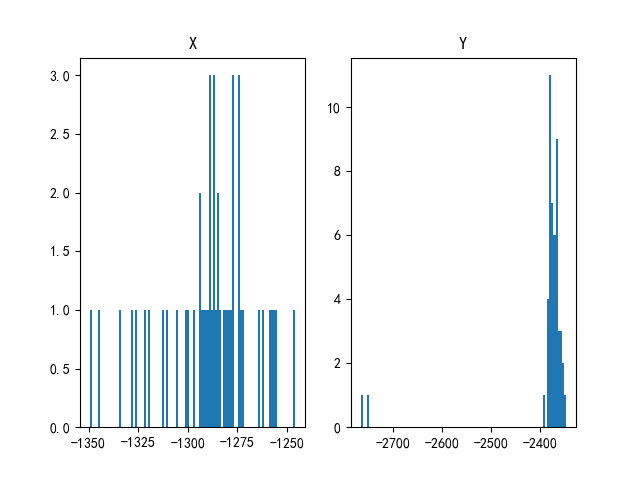

In [17]:
#将列表转换为np.array
B1_XY_B1_TDM1s = np.array(B1_XY_B1_TDM1s)

#X方向坐标
B1_X_B1_TDM1s = B1_XY_B1_TDM1s[:,0]
print("Mean_X: ",B1_X_B1_TDM1s.mean())
print("3sigmaX: ",B1_X_B1_TDM1s.std()*3)

#Y方向坐标
B1_Y_B1_TDM1s = B1_XY_B1_TDM1s[:,1]
print("Mean_Y: ",B1_Y_B1_TDM1s.mean())
print("3sigmaY: ",B1_Y_B1_TDM1s.std()*3)


fig,ax = plt.subplots(1,2)
ax[0].hist(B1_X_B1_TDM1s,bins=100)
ax[0].set_title("X")
ax[1].hist(B1_Y_B1_TDM1s,bins=100)
ax[1].set_title("Y")
plt.show()

### 2.求TopDieMark2在标定片1坐标系下的点
计算上视UL到标定片B2的旋转矩阵，将上视定位的TopDieMark2到标定片2原点的结果映射到标定片2坐标系上 \
也即求出TopDieMark2相对于标定片B2的坐标。表示为[B2_X_B2_TDM2,B2_X_B2_TDM2 \
通过标定出的T_B1_B2(标定片B2到标定片B1)传递矩阵，将B2_X_B2_TDM2映射为[B1_X_B1_TDM2,B1_Y_B1_TDM2]

In [26]:
X_ULB2_2_1,Y_ULB2_2_1 = df1['U_RBM2X'] - df1['U_RBM1X'],df1['U_RBM2Y'] - df1['U_RBM1Y']
X_ULB2_3_1,Y_ULB2_3_1 = df1['U_RBM3X'] - df1['U_RBM1X'],df1['U_RBM3Y'] - df1['U_RBM1Y']
UL_X_B2_TDM2 = df1['TDM2X'] - df1['U_RBM1X']
UL_Y_B2_TDM2 = df1['TDM2Y'] - df1['U_RBM1Y']

In [31]:
(np.arctan(Y_ULB2_2_1/X_ULB2_2_1)*180/np.pi).std()*3

0.005278765810857469

In [32]:
(np.arctan(Y_ULB2_3_1/X_ULB2_3_1)*180/np.pi).std()*3

0.0051327468492986025

In [35]:
#经过上视UL到标定片B2的旋转矩阵，将上视定位的TopDieMark2到标定片2原点的结果映射到标定片2坐标系上 [B2_X_B2_TDM2,B2_Y_B2_TDM2]
B2_XY_B2_TDM2s = []

#旋转矩阵存储
R_B2_ULs = []

#存储转换到B1标定片下的坐标
B1_XY_B1_TDM2s = [] 

T_B1_B2 = np.array([[1.00000019698036,	0.000707624373592419,	11548.444599616],
                    [0.000160584018765638,	1.00000067072042,	0.854494721912245],
                    [0,0,1]])

for i in range(len(X_ULB2_2_1)):
    #标定片方向矢量在视觉坐标系中的描述
    A_L = np.array([[X_ULB2_2_1[i],X_ULB2_3_1[i]],
                    [Y_ULB2_2_1[i],Y_ULB2_3_1[i]]])
    
    #标定片向量矩阵
    #标定片方向矢量在自身坐标系中的描述
    B_B = np.array([[((X_ULB2_2_1[i])**2 + (Y_ULB2_2_1[i])**2)**0.5, 0                                   ],
                    [0,                                    ((X_ULB2_3_1[i])**2 + (Y_ULB2_3_1[i])**2)**0.5]])
    #^B1_UL R = B*A^-1从标定片转向上视坐标系的旋转矩阵
    R_B_L = np.dot(B_B,np.linalg.inv(A_L))
    R_B2_ULs.append(R_B_L)

    #变量乘以旋转矩阵
    b = np.array([[UL_X_B2_TDM2[i]],
                  [UL_Y_B2_TDM2[i]]])    
    B2_XY = np.dot(R_B_L,b)
    B2_XY_B2_TDM2s.append(B2_XY)

    
    #通过B2->B1的传递矩阵映射
    b2 = np.array([[B2_XY[0][0]],
                   [B2_XY[1][0]],
                   [1]])
    b_B1_XY_B1_TDM2 = np.dot(T_B1_B2,b2)
    B1_XY_B1_TDM2s.append(b_B1_XY_B1_TDM2)

C:\Users\yangd\AppData\Local\Temp\ipykernel_49372\3753703737.py:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  A_L = np.array([[X_ULB2_2_1[i],X_ULB2_3_1[i]],
C:\Users\yangd\AppData\Local\Temp\ipykernel_49372\3753703737.py:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  [Y_ULB2_2_1[i],Y_ULB2_3_1[i]]])
C:\Users\yangd\AppData\Local\Temp\ipykernel_49372\3753703737.py:21: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  B_B = np.array(

Mean_X:  998.7863788837781
3sigmaX:  67.7367166244652
Mean_Y:  -2217.194220002301
3sigmaY:  284.3281393603407


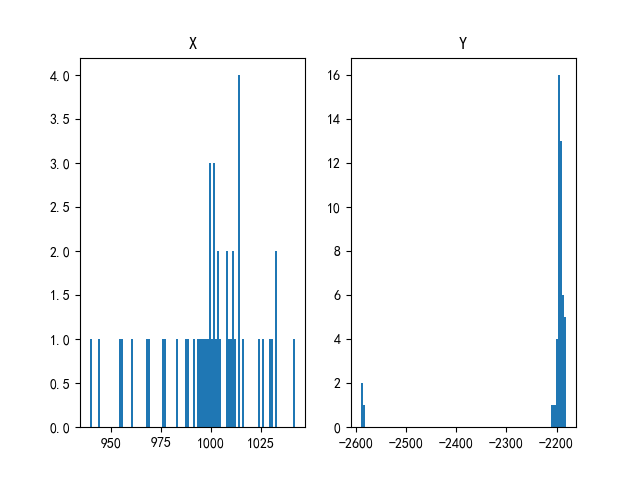

In [36]:
#将列表转换为np.array
B2_XY_B2_TDM2s = np.array(B2_XY_B2_TDM2s)

#X方向坐标
B2_X_B2_TDM2s = B2_XY_B2_TDM2s[:,0]
print("Mean_X: ",B2_X_B2_TDM2s.mean())
print("3sigmaX: ",B2_X_B2_TDM2s.std()*3)

#Y方向坐标
B2_Y_B2_TDM2s = B2_XY_B2_TDM2s[:,1]
print("Mean_Y: ",B2_Y_B2_TDM2s.mean())
print("3sigmaY: ",B2_Y_B2_TDM2s.std()*3)


fig,ax = plt.subplots(1,2)
ax[0].hist(B2_X_B2_TDM2s,bins=100)
ax[0].set_title("X")
ax[1].hist(B2_Y_B2_TDM2s,bins=100)
ax[1].set_title("Y")
plt.show()

Mean_X:  12545.662234570016
3sigmaX:  67.78745697786795
Mean_Y:  -2216.1808232672183
3sigmaY:  284.33105761007664


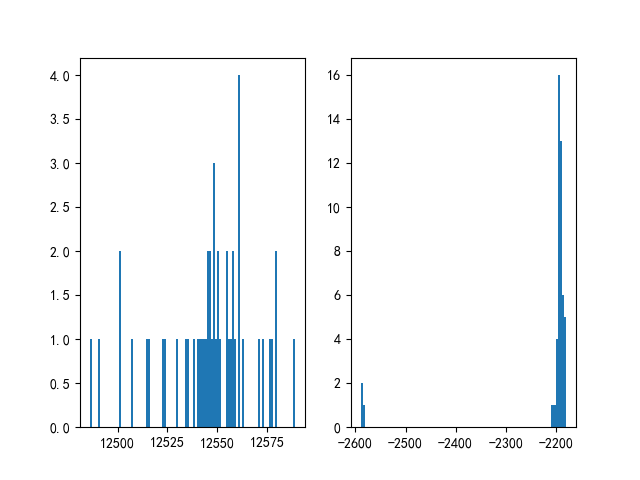

In [37]:
#将列表转换为np.array
B1_XY_B1_TDM2s = np.array(B1_XY_B1_TDM2s)
#X方向坐标
B1_X_B1_TDM2s = B1_XY_B1_TDM2s[:,0]
print("Mean_X: ",B1_X_B1_TDM2s.mean())
print("3sigmaX: ",B1_X_B1_TDM2s.std()*3)
#Y方向坐标
B1_Y_B1_TDM2s = B1_XY_B1_TDM2s[:,1]
print("Mean_Y: ",B1_Y_B1_TDM2s.mean())
print("3sigmaY: ",B1_Y_B1_TDM2s.std()*3)

fig,ax = plt.subplots(1,2)
ax[0].hist(B1_X_B1_TDM2s,bins=100)
ax[1].hist(B1_Y_B1_TDM2s,bins=100)
plt.show()

In [38]:
TopDieMarkLength = ((B1_X_B1_TDM2s - B1_X_B1_TDM1s)**2 + (B1_Y_B1_TDM2s - B1_Y_B1_TDM1s)**2)**0.5
TopDieMarkLength.mean()

13836.343890550499

In [39]:
TopDieMarkLength.std()*3

5.898888765859403

### 3.求BottomDieMark1在标定片1坐标系下的点
计算下视DL到标定片B1的旋转矩阵，将下视定位的BottomDieMark1到标定片1原点的结果映射到标定片1坐标系上 \
也即求出BottomDieMark1相对于标定片B1的坐标。表示为[B1_X_B1_BDM1,B1_Y_B1_BDM1]

In [41]:
X_DL1B1_2_1,Y_DL1B1_2_1 = df1['D_LBM2X'] - df1['D_LBM1X'],df1['D_LBM2Y'] - df1['D_LBM1Y']
X_DL1B1_3_1,Y_DL1B1_3_1 = df1['D_LBM3X'] - df1['D_LBM1X'],df1['D_LBM3Y'] - df1['D_LBM1Y']
DL_X_B1_BDM1 = df1['BDM1X'] - df1['D_LBM1X']
DL_Y_B1_BDM1 = df1['BDM1Y'] - df1['D_LBM1Y']

In [42]:
#经过下视DL1到标定片B1的旋转矩阵，将下视DL1定位的BottomDieMark1到标定片1原点的结果映射到标定片1坐标系上 [B1_X_B1_BDM1,B1_Y_B1_BDM1]
B1_XY_B1_BDM1s = []

#旋转矩阵存储
R_B1_DL1s = []

for i in range(len(X_DL1B1_2_1)):
    #标定片方向矢量在视觉坐标系中的描述
    A_L = np.array([[X_DL1B1_2_1[i],X_DL1B1_3_1[i]],
                    [Y_DL1B1_2_1[i],Y_DL1B1_3_1[i]]])
    
    #标定片向量矩阵
    #标定片方向矢量在自身坐标系中的描述
    B_B = np.array([[800, 0     ],
                    [0,      800]])
    
    #^B1_UL R = B*A^-1从标定片转向上视坐标系的旋转矩阵
    R_B_L = np.dot(B_B,np.linalg.inv(A_L))
    R_B1_DL1s.append(R_B_L)

    #变量乘以旋转矩阵
    b = np.array([[DL_X_B1_BDM1[i]],
                  [DL_Y_B1_BDM1[i]]])    
    B1_XY = np.dot(R_B_L,b)
    B1_XY_B1_BDM1s.append(B1_XY)

C:\Users\yangd\AppData\Local\Temp\ipykernel_49372\1943442408.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  A_L = np.array([[X_DL1B1_2_1[i],X_DL1B1_3_1[i]],
C:\Users\yangd\AppData\Local\Temp\ipykernel_49372\1943442408.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  [Y_DL1B1_2_1[i],Y_DL1B1_3_1[i]]])
C:\Users\yangd\AppData\Local\Temp\ipykernel_49372\1943442408.py:22: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  b = np.array

Mean_X:  -1292.8464731197375
3sigmaX:  77.18151447404463
Mean_Y:  -2392.02212427001
3sigmaY:  232.4939362758427


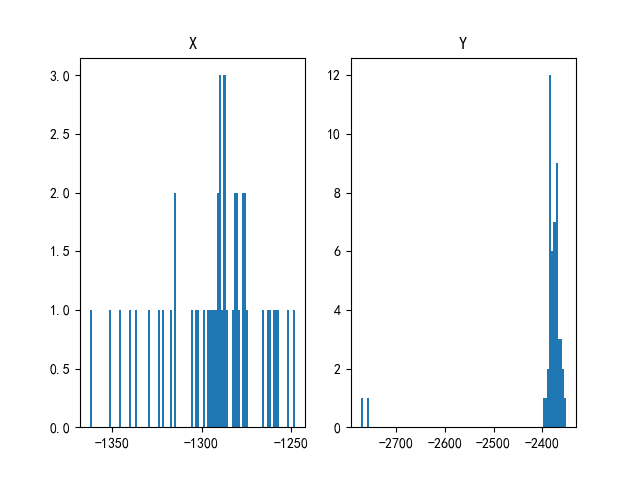

In [43]:
#将列表转换为np.array
B1_XY_B1_BDM1s = np.array(B1_XY_B1_BDM1s)
#X方向坐标
B1_X_B1_BDM1s = B1_XY_B1_BDM1s[:,0]
print("Mean_X: ",B1_X_B1_BDM1s.mean())
print("3sigmaX: ",B1_X_B1_BDM1s.std()*3)
#Y方向坐标
B1_Y_B1_BDM1s = B1_XY_B1_BDM1s[:,1]
print("Mean_Y: ",B1_Y_B1_BDM1s.mean())
print("3sigmaY: ",B1_Y_B1_BDM1s.std()*3)

fig,ax = plt.subplots(1,2)
ax[0].hist(B1_X_B1_BDM1s,bins=100)
ax[0].set_title("X")
ax[1].hist(B1_Y_B1_BDM1s,bins=100)
ax[1].set_title("Y")
plt.show()

### 4.求BottomDieMark2在标定片1坐标系下的点

In [44]:
X_DL2B2_2_1,Y_DL2B2_2_1 = df1['D_RBM2X'] - df1['D_RBM1X'],df1['D_RBM2Y'] - df1['D_RBM1Y']
X_DL2B2_3_1,Y_DL2B2_3_1 = df1['D_RBM3X'] - df1['D_RBM1X'],df1['D_RBM3Y'] - df1['D_RBM1Y']
DL_X_B2_BDM2 = df1['BDM2X'] - df1['D_RBM1X']
DL_Y_B2_BDM2 = df1['BDM2Y'] - df1['D_RBM1Y']

In [ ]:
#经过下视DL2到标定片B2的旋转矩阵，将下视DL2定位的BottomDieMark2到标定片2原点的结果映射到标定片2坐标系上 [B2_X_B2_BDM2,B2_Y_B2_BDM2]
B2_XY_B2_BDM2s = []

#旋转矩阵存储
R_B2_DL2s = []

#存储转换到B1标定片下的坐标
B1_XY_B1_BDM2s = []


T_B1_B2 = np.array([[1.00000019698036,	0.000707624373592419,	11548.444599616],
                    [0.000160584018765638,	1.00000067072042,	0.854494721912245],
                    [0,0,1]])


for i in range(len(X_DL2B2_2_1)):
    #标定片方向矢量在视觉坐标系中的描述
    A_L = np.array([[X_DL2B2_2_1[i],X_DL2B2_3_1[i]],
                    [Y_DL2B2_2_1[i],Y_DL2B2_3_1[i]]])
    
    #标定片向量矩阵
    #标定片方向矢量在自身坐标系中的描述
    B_B = np.array([[800, 0       ],
                    [0,    800]])
    #^B1_UL R = B*A^-1从标定片转向上视坐标系的旋转矩阵
    R_B_L = np.dot(B_B,np.linalg.inv(A_L))
    R_B2_DL2s.append(R_B_L)

    #变量乘以旋转矩阵
    b = np.array([[DL_X_B2_BDM2[i]],
                  [DL_Y_B2_BDM2[i]]])    
    B2_XY = np.dot(R_B_L,b)
    B2_XY_B2_BDM2s.append(B2_XY)

    
    #通过B2->B1的传递矩阵映射
    b2 = np.array([[B2_XY[0][0]],
                   [B2_XY[1][0]],
                   [1]])
    b_B1_XY_B1_BDM2 = np.dot(T_B1_B2,b2)
    B1_XY_B1_BDM2s.append(b_B1_XY_B1_BDM2)

    